# Statistiche e grafici delle risoluzioni dei cubi di Rubik

In [1]:
from pandas import read_csv
import matplotlib.pyplot as plt
import modulo_rubik

df = read_csv("../database.csv", sep="\t", parse_dates=["Data"])
# Inserimento colonna "Tempo" con i secondi convertiti in minuti e secondi
df.insert(loc=2, column="Tempo", value=df["Secondi"].apply(modulo_rubik.conversione_secondi))

## Record personali per tipo di cubo 🥇🥈🥉

In [2]:
# Elenco di tutti i record
modulo_rubik.mostra_record(df=df)

                Tempo
Cubo                 
2x2        (0, 15.12)
3x3        (0, 40.44)
4x4         (3, 5.99)
Mirror     (3, 58.89)
5x5        (7, 49.48)
Megaminx  (30, 10.61)


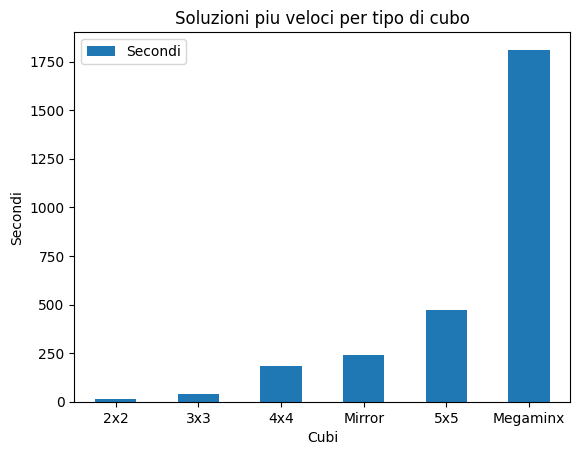

In [3]:
# Creazione grafico di tutti i record
modulo_rubik.grafico_tutti_record(df=df)

## Medie dei tempi di risoluzione

In [4]:
modulo_rubik.calcola_media_risoluzioni(df=df)

Media in secondi

 Cubo
2x2           60.92
3x3           71.97
4x4          257.62
5x5          695.84
Megaminx    2155.38
Mirror       520.58
Name: Secondi, dtype: float64 

Media in minuti e secondi

Cubo     Minuti e secondi
2x2 	 (1, 0.92)
3x3 	 (1, 11.97)
4x4 	 (4, 17.62)
5x5 	 (11, 35.84)
Megaminx 	 (35, 55.38)
Mirror 	 (8, 40.58)


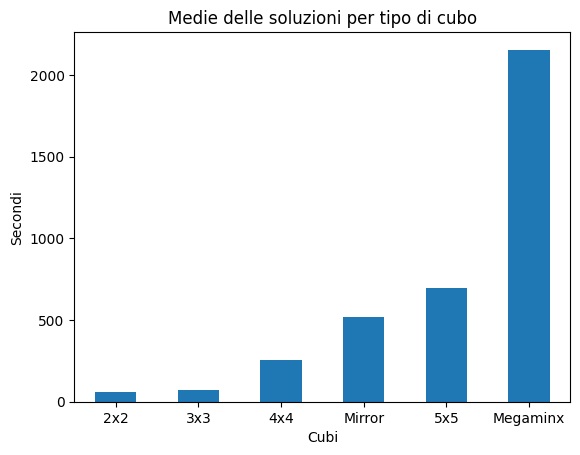

In [5]:
# Creazione grafico
modulo_rubik.grafico_media_risoluzioni(df=df)

## Numero di risoluzioni

In [6]:
# Numero di risoluzioni dei diversi cubi
modulo_rubik.calcola_num_risoluzioni(df=df)

Cubo
3x3         71
4x4         60
2x2         53
5x5         29
Mirror       9
Megaminx     3
Name: count, dtype: int64


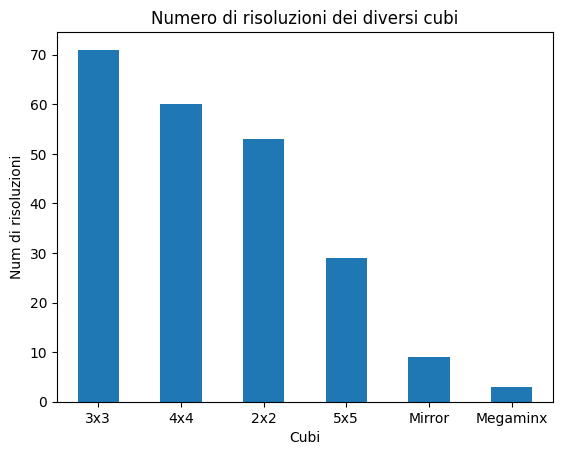

In [7]:
# Creazione grafico
modulo_rubik.grafico_num_risoluzioni(df=df)

In [8]:
df = modulo_rubik.aggiunta_colonne_data(df)

In [9]:
# Numero di risoluzioni del 2025 per ogni mese
df[df["Anno"] == 2025]["Mese"].value_counts()

Mese
Gen    41
Feb    35
Ago    29
Nov    25
Mag    24
Lug    14
Set    12
Mar    12
Ott     6
Apr     2
Name: count, dtype: int64

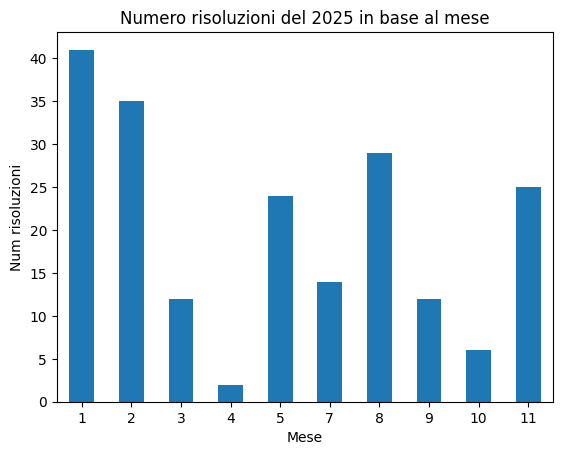

In [10]:
# Grafico del numero di risoluzioni del 2025 mese per mese
modulo_rubik.grafico_risoluz_mensile(df_cubo=df, anno=2025)

In [ ]:
# Numero di risoluzioni del 2026 per ogni mese
df[df["Anno"] == 2026]["Mese"].value_counts()

Mese
Gen    17
Feb     8
Name: count, dtype: int64

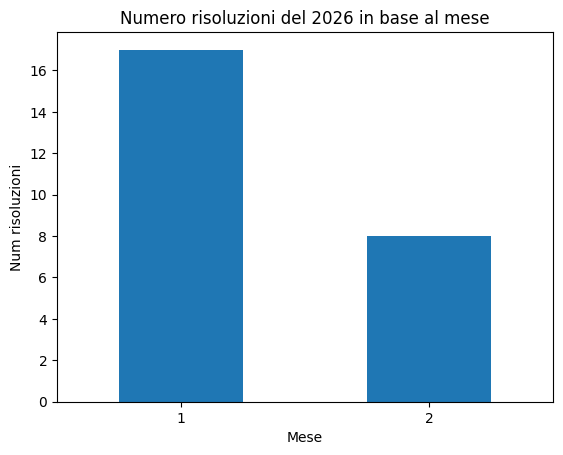

In [14]:
# Grafico del numero di risoluzioni del 2026 mese per mese
modulo_rubik.grafico_risoluz_mensile(df_cubo=df, anno=2026)

In [11]:
# Ultime 10 risoluzioni
df.tail(10)

,Data completa,Anno,Mese,Giorno,Secondi,Tempo,Cubo
215,2026-01-31,2026,Gen,31,185.99,"(3, 5.99)",4x4
216,2026-01-31,2026,Gen,31,234.47,"(3, 54.47)",4x4
217,2026-02-01,2026,Feb,1,473.78,"(7, 53.78)",5x5
218,2026-02-01,2026,Feb,1,671.45,"(11, 11.45)",5x5
219,2026-02-01,2026,Feb,1,219.35,"(3, 39.35)",4x4
220,2026-02-01,2026,Feb,1,203.61,"(3, 23.61)",4x4
221,2026-02-01,2026,Feb,1,225.93,"(3, 45.93)",4x4
222,2026-02-01,2026,Feb,1,229.57,"(3, 49.57)",4x4
223,2026-02-01,2026,Feb,1,219.19,"(3, 39.19)",4x4
224,2026-02-01,2026,Feb,1,245.37,"(4, 5.37)",4x4
